In [10]:
#pip install tensorflow

In [11]:
import keras
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [12]:
#importing dataset
df=pd.read_csv("IMDB Dataset SPANISH.csv",on_bad_lines='skip')
print (df.head())

   Unnamed: 0                                          review_en  \
0           0  One of the other reviewers has mentioned that ...   
1           1  A wonderful little production. The filming tec...   
2           2  I thought this was a wonderful way to spend ti...   
3           3  Basically there's a family where a little boy ...   
4           4  Petter Mattei's "Love in the Time of Money" is...   

                                           review_es sentiment sentimiento  
0  Uno de los otros críticos ha mencionado que de...  positive    positivo  
1  Una pequeña pequeña producción.La técnica de f...  positive    positivo  
2  Pensé que esta era una manera maravillosa de p...  positive    positivo  
3  Básicamente, hay una familia donde un niño peq...  negative    negativo  
4  El "amor en el tiempo" de Petter Mattei es una...  positive    positivo  


In [13]:
#sentiment count
print("Total :\n",df['sentimiento'].value_counts())

Total :
 sentimiento
positivo    25000
negativo    25000
Name: count, dtype: int64


In [14]:
review = []

sentences = list (df['review_es'])
for sen in sentences:
 review.append(sen)

In [15]:
labels = df['sentimiento']
labels = np.array(list(map(lambda x: 1 if x=="positivo" else 0, labels)))

In [16]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

In [17]:
# Parameters
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type="post"
oov_tok = "<00V>"

Tokenización y acolchado Secuencias

In [18]:
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Initialize the Tokenizer class
tokenizer = Tokenizer (num_words = vocab_size, oov_token=oov_tok)
# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences (sequences, maxlen=max_length, truncating=trunc_type)
# Generate and pad the test sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)

Construcción del modelo

In [19]:
# Build the model
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64,return_sequences=True),
    keras.layers.LSTM(32,return_sequences=True),
    keras.layers.LSTM(16),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Resumen del modelo

In [20]:
# Setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Print the model summary
model.summary ()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Construcción y entrenamiento del modelo

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 185s 143ms/step - accuracy: 0.5085 - loss: 0.6933 - val_accuracy: 0.5133 - val_loss: 0.6929
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 199s 141ms/step - accuracy: 0.5108 - loss: 0.6927 - val_accuracy: 0.5135 - val_loss: 0.6931
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 176s 141ms/step - accuracy: 0.5077 - loss: 0.6928 - val_accuracy: 0.5136 - val_loss: 0.6931
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 176s 141ms/step - accuracy: 0.5157 - loss: 0.6925 - val_accuracy: 0.5223 - val_loss: 0.6925
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 213s 150ms/step - accuracy: 0.5275 - loss: 0.6910 - val_accuracy: 0.5215 - val_loss: 0.6925
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 190s 140ms/step - accuracy: 0.5435 - loss: 0.6890 - val_accuracy: 0.5794 - val_loss: 0.6925
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 173s 139ms/step - accuracy: 0.5706 - loss: 0.6762 - val_accuracy: 0.7008 - val_loss: 0.5968
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 139ms/step - ac

<Axes: >

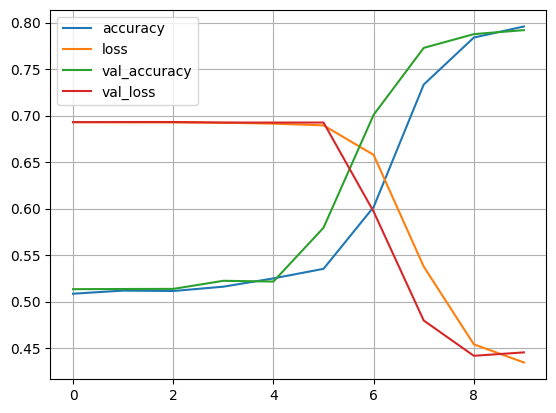

In [21]:
num_epochs = 10
# Train the model
history = model. fit(padded,train_labels,epochs=num_epochs,validation_data=(test_padded, test_labels))
# Graficar el historial de entrenamiento:
pd.DataFrame(history. history) .plot(grid=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step
Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1-Score: 0.79
Confusion Matrix:
[[4099 1002]
 [1079 3820]]


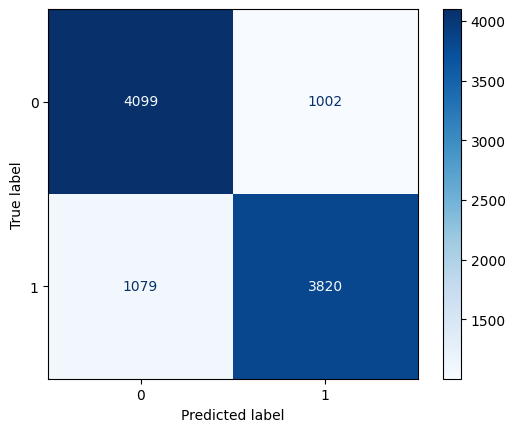

In [22]:
#Métricas
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score,recall_score

# Obtener las predicciones del modelo sobre el conjunto de prueba
predictions = model.predict(test_padded)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Calcular Métricas
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels,predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels)

# Imprimir las métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)
# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step


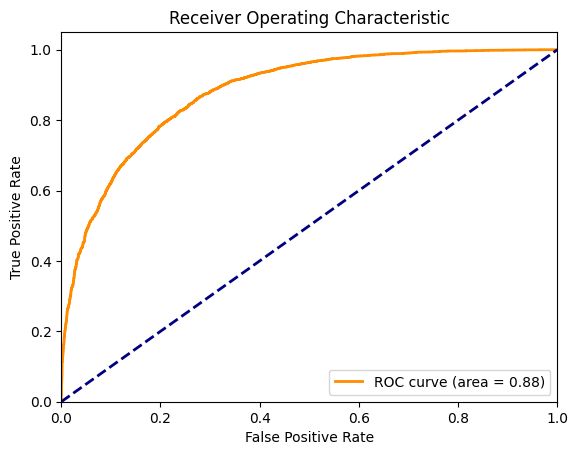

AUC: 0.88


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de las predicciones
y_prob = model.predict(test_padded).ravel()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(test_labels, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step


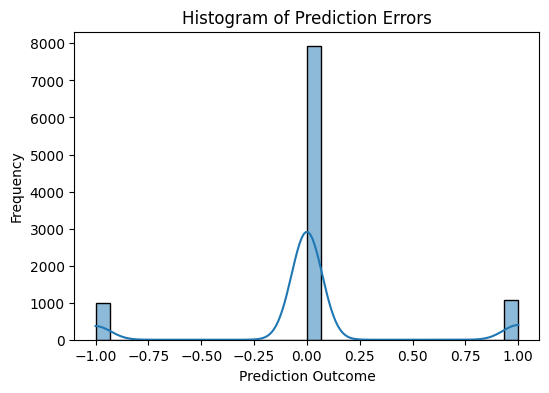

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las predicciones del modelo
y_pred = (model.predict(test_padded) > 0.5).astype("int32")

# Calcular los errores como la diferencia entre las etiquetas verdaderas y las predicciones
errors = np.array(test_labels) - np.array(y_pred).flatten()

# Crear el histograma de errores con barras más delgadas
plt.figure(figsize=(6, 4))
sns.histplot(errors, kde=True, bins=30)
plt.xlabel('Prediction Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()